In [281]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier



In [282]:
df=pd.read_csv("weatherAUS.csv")

In [283]:
df.dropna(subset=["RainTomorrow"],inplace=True)

# Preparing the Data for Training

Dividing the data fra;e into three sections: one for training the model, one for validation and the lasts one for testing

In [284]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

# Input and Target Columns

In [285]:
input_cols = list(df.columns)[1:-1]
target_col = 'RainTomorrow'

In [286]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.drop(columns='Date').select_dtypes('object').columns.tolist()

### Encoding categorical columns

In [287]:
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [288]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [289]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

**Encoding the categorical columns:**

In [290]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])
val_df[encoded_cols] = encoder.transform(val_df[categorical_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\4023326497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\4023326497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\4023326497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

### Scaing numeric features

In [291]:
scaler= MinMaxScaler()

In [292]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

**Transforming the numiricla columns with the sclaer:**

In [293]:
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
val_df[numeric_cols]=scaler.transform(val_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\1661531063.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\1661531063.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\1661531063.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

### Filling the missign numeric data

In [294]:
imputer=SimpleImputer(strategy='mean')

In [295]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [296]:
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols])
val_df[numeric_cols]=imputer.transform(val_df[numeric_cols])
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\2838723703.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\2838723703.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19032\2838723703.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

**making sure there's not null values left:**

In [297]:
train_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Setting the input and output columns

To prepare the data for modeling, we remove target-related columns, categorical features, and the date, keeping only relevant numerical inputs.

The RainTomorrow column is used as the target variable for training, validation, and testing. This ensures the model learns from appropriate features and can be evaluated effectively.

In [298]:
rain_tomorrow_columns=["RainTomorrow_No","RainTomorrow_Yes","RainTomorrow"]

train_inputs=train_df.drop(columns=rain_tomorrow_columns+categorical_cols+['Date']).copy()
val_inputs=val_df.drop(columns= rain_tomorrow_columns+categorical_cols+['Date']).copy()
test_inputs=test_df.drop(columns=rain_tomorrow_columns+categorical_cols+['Date']).copy()

train_target=train_df["RainTomorrow"]
val_target=val_df["RainTomorrow"]
test_target=test_df["RainTomorrow"]

# Training and Visualizing Decision Trees

In this step, we train a Decision Tree model using the prepared input features and target values. Decision Trees are intuitive and interpretable machine learning models that split data based on feature values to make predictions. After training, we visualize the tree to better understand the decision rules the model has learned and how it classifies the data.

In [299]:
model=DecisionTreeClassifier(random_state=42)

In [300]:
%%time
model.fit(train_inputs,train_target)

CPU times: total: 2.5 s
Wall time: 3.75 s


DecisionTreeClassifier(random_state=42)

In [301]:
train_preds=model.predict(train_inputs)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [302]:
training_acc1=accuracy_score(train_target, train_preds)
training_acc1

0.9999797955307714

An accuracy score of 1.0 suggests the model is performing exceptionally well on the current data. However, such a perfect score may indicate overfitting.

To properly evaluate the model’s ability to generalize, we need to test it on unseen data — specifically, the validation dataset. Let’s move forward with this step to assess its real-world performance.

In [303]:
val_preds=model.predict(val_inputs)

In [304]:
val_acc1=accuracy_score(val_target, val_preds)
val_acc1

0.7953107770878068

The model achieved an accuracy of 0.79 on the validation dataset, which suggests it performs reasonably well in predicting unseen outcomes. However, during training, the model may have achieved near-perfect accuracy, indicating that it has potentially memorized the training examples rather than learning generalizable patterns. This phenomenon is known as overfitting, where the model performs exceptionally on training data but struggles with new, unseen data.

# Tree Visualisation

[Text(0.5, 0.875, 'Humidity3pm <= 0.685\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Sunshine <= 0.534\ngini = 0.23\nsamples = 77459\nvalue = [67204, 10255]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pressure3pm <= 0.583\ngini = 0.397\nsamples = 16086\nvalue = [11687, 4399]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.535\ngini = 0.173\nsamples = 61373\nvalue = [55517, 5856]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.815\ngini = 0.493\nsamples = 21529\nvalue = [9501, 12028]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.491\nsamples = 12306\nvalue = [6983.0, 5323.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity3pm <= 26.241\ngini = 0.397\nsamples = 9223\nvalue = [2518, 6705]'),
 Text(0.8125, 0.125

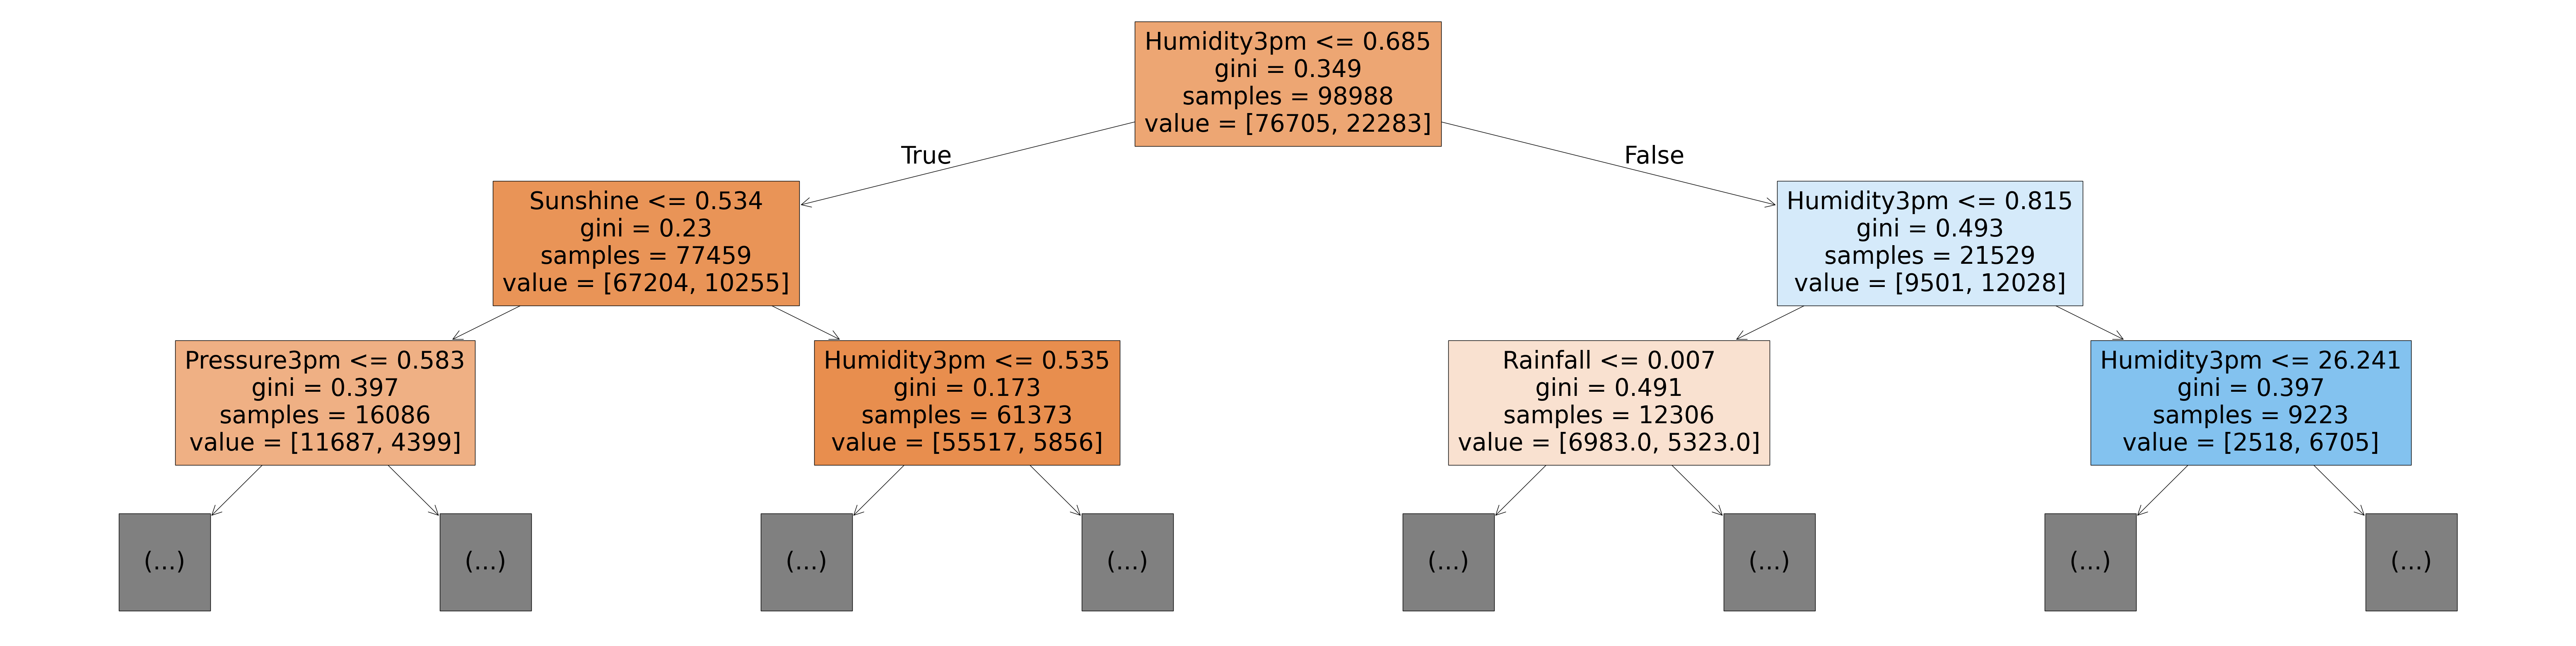

In [305]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth=2, filled=True)

### To understand better how the tree is created:

#### 1. **Choosing the Root (Best Feature to Split)**

The tree chooses the feature that best **splits the data** into groups where most values belong to the same class.

#### 2. **How? Using a "Purity" Measure**

Two common ways to measure how "pure" a split is:

- **Gini Impurity**:
  - Measures how mixed the classes are.
  - The lower the Gini, the better the split.
- **Entropy**:
  - Measures the level of disorder.
  - The more ordered (pure) the group, the lower the entropy.

#### 3. **Information Gain**
- Used with entropy.
- Measures how much better (more pure) the data becomes after the split.

#### 4. **Repeat**
- After the root is chosen, the tree does the same for each new branch.
- It stops when:
  - The data is already pure,
  - There's nothing left to split,
  - Or a max depth is reached.


---

Let us take a closer look at how the root node is selected during the decision tree construction process.

For that we will create a data frame containing both the features of the model and their importance in the training of the model. Then we will make sure that the feature wuth the max importnace is 'Humidity3pm'.


In [306]:
importances = pd.DataFrame({
    'features': train_inputs.columns,
    'importance': model.feature_importances_
})
importances.sort_values(by='importance', ascending=False, inplace=True)
importances

,features,importance
9,Humidity3pm,0.269245
11,Pressure3pm,0.066214
4,Sunshine,0.054813
2,Rainfall,0.050276
5,WindGustSpeed,0.044102
...,...,...
29,Location_Darwin,0.000300
115,WindDir3pm_nan,0.000255
32,Location_Katherine,0.000185
40,Location_Newcastle,0.000090


Text(0.5, 1.0, 'Features Ordered by Importance')

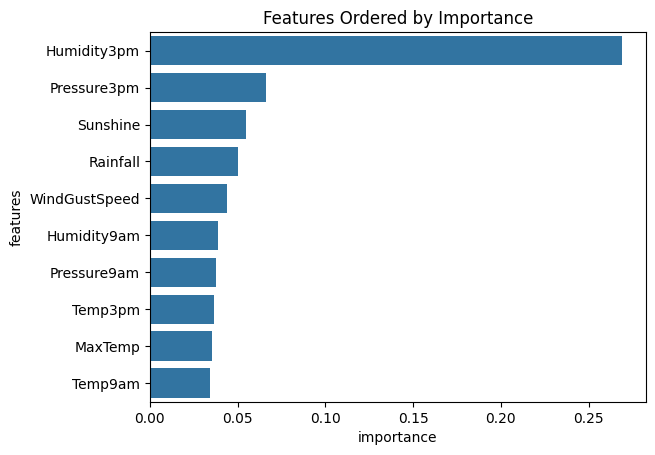

In [307]:
sns.barplot(data=importances.head(10),x='importance',y="features")
plt.title('Features Ordered by Importance')

Indeed 'Humidity3pm' is the most important feature!

# Hyperparameter Tuning and Overfitting

Now, let's revisit the overfitting issue we encountered earlier, where our model achieved 100% accuracy on the training data but significantly dropped in performance when tested with new data.

To address this, we will begin by adjusting some of the arguments in the DecisionTreeClassifier.


We've learned that overfitting might be caused by the big depth of the tree since, and the opposite of what i was thinking, too many details that are specefic to the training data might lead the model to simply memorize the data adn not learning the general patern so it can apply it to other inputs. Thus lower depth trees prevent overfitting.

The same logique applies also on the leaf nodes number.

But, we shouls keepin mind that if they'reset too low underfitting might result.



In [308]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(train_inputs, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [309]:
train_acc2=model.score(train_inputs,train_target)
train_acc2

0.830666343395159

In [310]:
val_acc2=model.score(val_inputs,val_target)
val_acc2

0.8347164993325982

Great! Because, while the accuracy of the training set got lower, as excpected of course, the accuracy of the validation and test sets increased signifiantly.

This chart is to visualize the improvement.

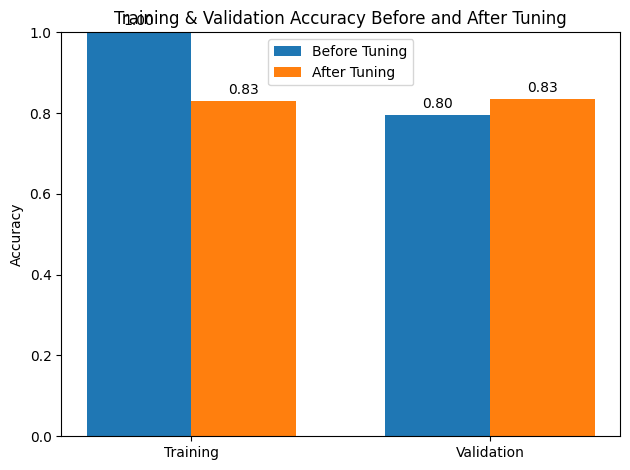

In [311]:

labels = ['Training', 'Validation']
first_accuracies = [training_acc1, val_acc1]
second_accuracies = [train_acc2, val_acc2]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, first_accuracies, width, label='Before Tuning')
bars2 = ax.bar(x + width/2, second_accuracies, width, label='After Tuning')

ax.set_ylabel('Accuracy')
ax.set_title('Training & Validation Accuracy Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


This is a helper function to expirement the effect of different depths on the model

In [312]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_inputs, train_target)
    train_acc = 1 - model.score(train_inputs, train_target)
    val_acc = 1 - model.score(val_inputs, val_target)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [313]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

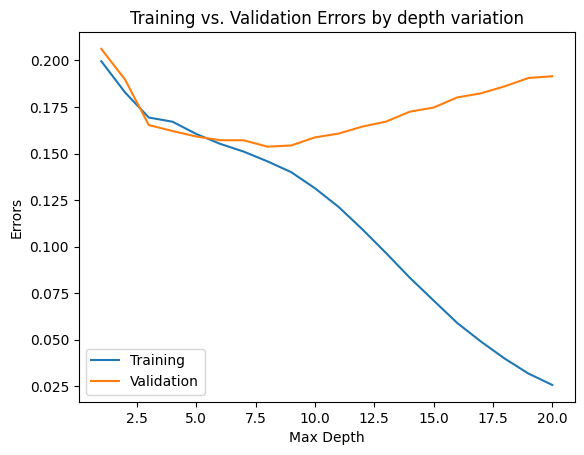

In [314]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title("Training vs. Validation Errors by depth variation")
plt.xlabel('Max Depth')
plt.ylabel('Errors')
plt.legend(['Training','Validation'])
plt.show()

**Conclusion:** In the above case, it appears that a maximum depth of 8 results in the lowest validation error.

#### Max_leaf_nodes
The next parameter we’ll explore to help reduce validation prediction errors is the number of leaf nodes. By limiting the number of leaf nodes, we can control the complexity of the decision tree and potentially improve its generalization to unseen data.

In [315]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [316]:
model.fit(train_inputs, train_target)
model.score(train_inputs,train_target)


0.8499515092738513

In [317]:
model.score(val_inputs,val_target)

0.8449886831872787

This is a function to genrate a dictionnary grouping a number of the max leaf nodes, training error and the validation error.

In [328]:
def max_leaf_nodes_error(md):
    model = DecisionTreeClassifier(max_depth=9, random_state=md)
    model.fit(train_inputs, train_target)
    train_acc = 1 - model.score(train_inputs, train_target)
    val_acc = 1 - model.score(val_inputs, val_target)
    return {'Max leaf nodes': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [329]:
leaf_errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,28)])

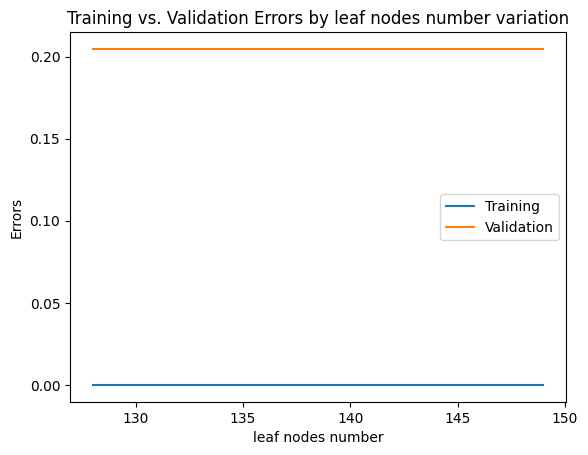

In [330]:
plt.figure()
plt.plot(leaf_errors_df['Max Depth'], leaf_errors_df['Training Error'])
plt.plot(leaf_errors_df['Max Depth'], leaf_errors_df['Validation Error'])
plt.title("Training vs. Validation Errors by leaf nodes number variation")
plt.xlabel('leaf nodes number')
plt.ylabel('Errors')
plt.legend(['Training','Validation'])
plt.show()

The maximum leaf nodes number is 8 because it is the number for which the validation error is minimal

In [321]:
max_leaf_nodes_error(8)

{'Max leaf nodes': 8,
 'Training Error': 0.13999676728492338,
 'Validation Error': 0.15483721200162492}

# Training a Random Forest

While tuning the hyperparameters of a single decision tree can lead to some improvements, a much more powerful approach is to combine the outputs of several decision trees, each trained with slightly different parameters. This technique is known as a random forest.

The key idea behind a random forest is that each decision tree in the ensemble makes different types of errors. Since each tree has a slightly different perspective on the data, their mistakes won't be exactly the same. By averaging the results of many trees, the errors from individual trees often cancel each other out, leading to a more accurate and robust prediction. This phenomenon is commonly referred to as the "wisdom of the crowd", where a group of diverse individuals (or models) can outperform any single member of the group. The collective decision is generally more reliable than the decision made by any one tree on its own.

In [322]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)


In [323]:
model.fit(train_inputs, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [324]:
model.score(train_inputs, train_target)


0.9999595910615429

In [325]:
model.score(val_inputs, val_target)

0.8554349718530555

The RandomForestClassifier achieved an accuracy of 0.8554, significantly outperforming the DecisionTreeClassifier, which had an accuracy of 0.7953. This improvement demonstrates the effectiveness of combining multiple decision trees.

# Making Predictions on New Inputs

In [326]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob



### **Conclusion**

In this project, we explored and implemented various machine learning models to predict **rainfall** based on weather data. We began by using a **DecisionTreeClassifier**, which provided a solid starting point but showed signs of overfitting, with a significant discrepancy between training and validation accuracy. To address this, we introduced the **RandomForestClassifier**, an ensemble learning technique that combined multiple decision trees to reduce overfitting and improve the model's generalization capabilities. This led to a notable increase in accuracy, from **0.7953** with the decision tree to **0.8554** with the random forest model.

Furthermore, we experimented with tuning model hyperparameters, such as limiting the **max depth** and **max leaf nodes** of individual decision trees, to control model complexity and improve its performance on unseen data. The project also involved preprocessing steps, including handling missing data and scaling numerical features, which were crucial for the model's overall performance.

Through careful experimentation and model evaluation, we have demonstrated how **ensemble methods** like random forests can significantly enhance predictive performance compared to a single decision tree, especially when dealing with complex, noisy data. The results highlight the importance of choosing the right model and fine-tuning its parameters to achieve the best possible outcomes.

Overall, the project showcases the practical application of machine learning techniques to real-world problems and emphasizes the importance of model selection, parameter tuning, and ensemble learning in achieving high-quality predictions.

